In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/pollster-ratings.csv')

df.head()

,Rank,Pollster,Pollster Rating ID,Polls Analyzed,AAPOR/Roper,Banned by 538,Predictive Plus-Minus,538 Grade,Mean-Reverted Bias,Races Called Correctly,...,Simple Average Error,Simple Expected Error,Simple Plus-Minus,Advanced Plus-Minus,Mean-Reverted Advanced Plus-Minus,# of Polls for Bias Analysis,Bias,House Effect,Average Distance from Polling Average (ADPA),Herding Penalty
0,1,The New York Times/Siena College,448,95,yes,no,-1.192860,A+,1.006012,0.747368,...,4.043250,5.364792,-1.318429,-1.625523,-1.318372,94,1.243260,0.700506,3.575558,0.261188
1,2,Selzer & Co.,304,53,yes,no,-1.175911,A+,0.161120,0.811321,...,4.916848,5.959235,-1.039274,-1.622671,-1.000844,35,0.297645,-0.343495,5.288403,0.000000
2,3,Research & Polling Inc.,280,44,no,no,-0.965392,A+,-0.582568,0.886364,...,4.177286,5.548050,-1.367651,-1.938115,-1.183301,43,-0.956078,0.632896,4.642076,0.286276
3,4,SurveyUSA,325,856,no,no,-0.917320,A+,0.003251,0.891355,...,4.681671,5.642531,-0.957747,-1.094410,-1.043528,697,0.003447,-0.526230,4.969035,0.126963
4,5,Marquette University Law School,195,15,yes,no,-0.908215,A/B,0.237527,0.800000,...,2.846556,5.938505,-3.088836,-3.191347,-1.208475,11,0.751227,-0.199840,4.201278,0.257600


In [10]:
df.columns

Index(['Rank', 'Pollster', 'Pollster Rating ID', 'Polls Analyzed',
       'AAPOR/Roper', 'Banned by 538', 'Predictive Plus-Minus', '538 Grade',
       'Mean-Reverted Bias', 'Races Called Correctly', 'Misses Outside MOE',
       'Simple Average Error', 'Simple Expected Error', 'Simple Plus-Minus',
       'Advanced Plus-Minus', 'Mean-Reverted Advanced Plus-Minus',
       '# of Polls for Bias Analysis', 'Bias', 'House Effect',
       'Average Distance from Polling Average (ADPA)', 'Herding Penalty'],
      dtype='object')

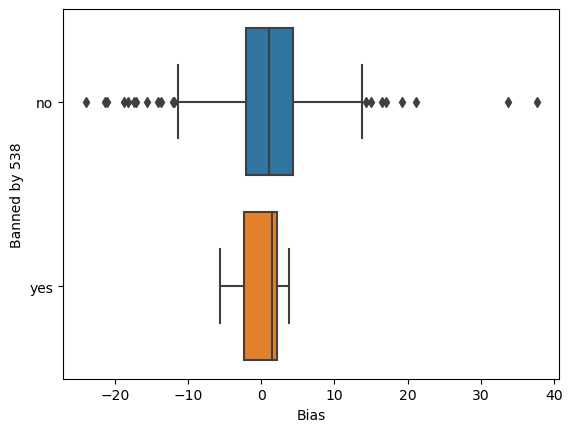

In [ ]:
sns.boxplot(df, x = 'Bias', y = 'Banned by 538');

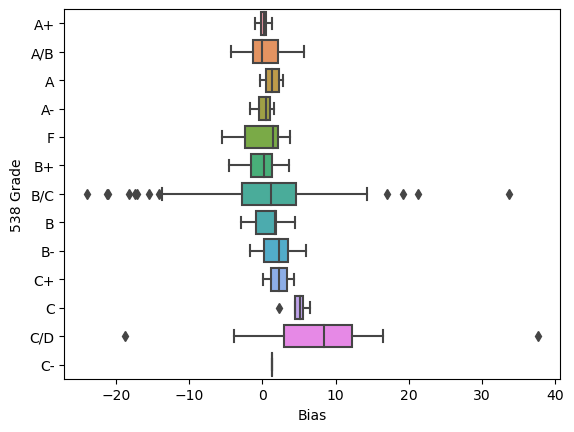

In [11]:
sns.boxplot(df, x = 'Bias', y = '538 Grade');

In [19]:
df['538 Grade'].value_counts()[sorted(df['538 Grade'].unique())] # Vast majority are graded B/C

A        8
A+       4
A-       9
A/B     47
B       10
B+      11
B-       9
B/C    382
C        4
C+       2
C-       1
C/D     19
F       11
Name: 538 Grade, dtype: int64

In [20]:
df['Banned by 538'].value_counts() # barely any are banned

no     506
yes     11
Name: Banned by 538, dtype: int64

In [21]:
df['AAPOR/Roper'].value_counts()

no     438
yes     79
Name: AAPOR/Roper, dtype: int64

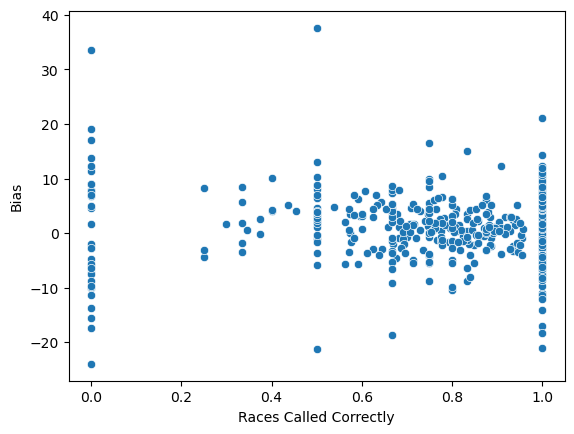

In [23]:
sns.scatterplot(
    data = df,
    x = 'Races Called Correctly',
    y = 'Bias'
);

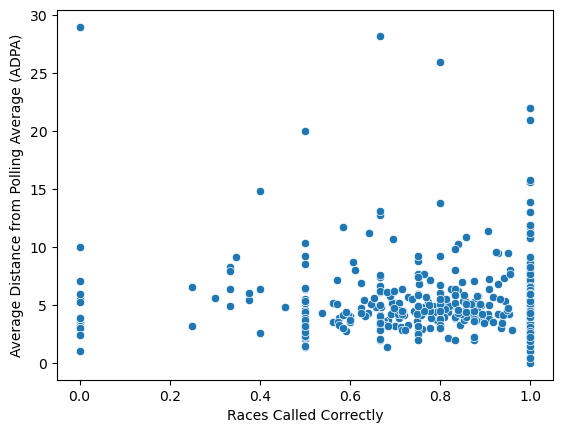

In [24]:
sns.scatterplot(
    data = df,
    x = 'Races Called Correctly',
    y = 'Average Distance from Polling Average (ADPA)'
);

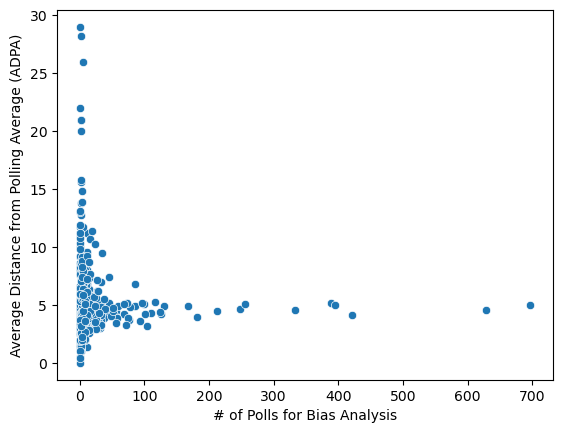

In [25]:
sns.scatterplot(
    data = df,
    x = '# of Polls for Bias Analysis',
    y = 'Average Distance from Polling Average (ADPA)'
);

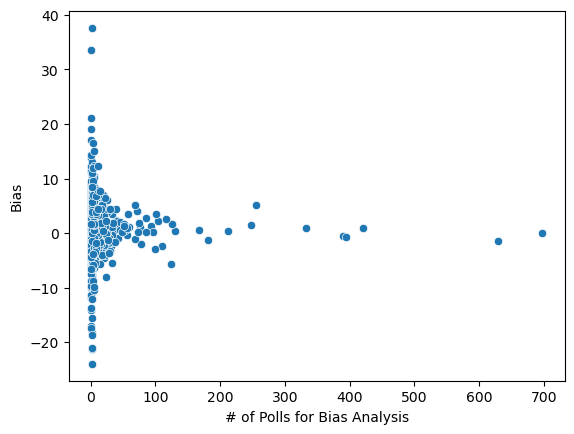

In [26]:
sns.scatterplot(
    data = df,
    x = '# of Polls for Bias Analysis',
    y = 'Bias'
);

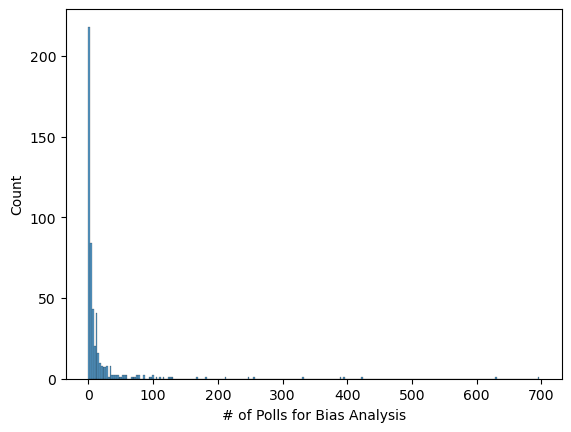

In [29]:
sns.histplot(
    data = df,
    x = '# of Polls for Bias Analysis'
);

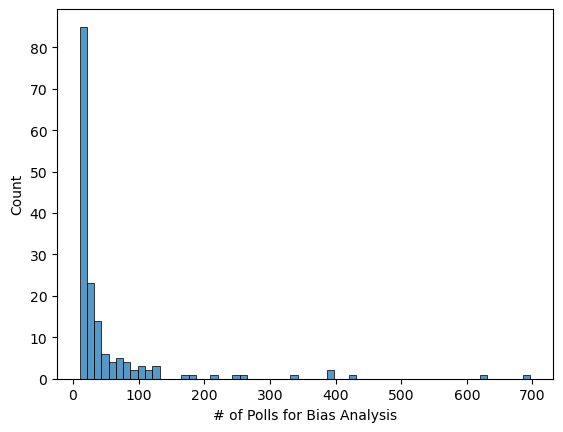

In [31]:
sns.histplot(
    data = df[df['# of Polls for Bias Analysis'] >= 10],
    x = '# of Polls for Bias Analysis'
);

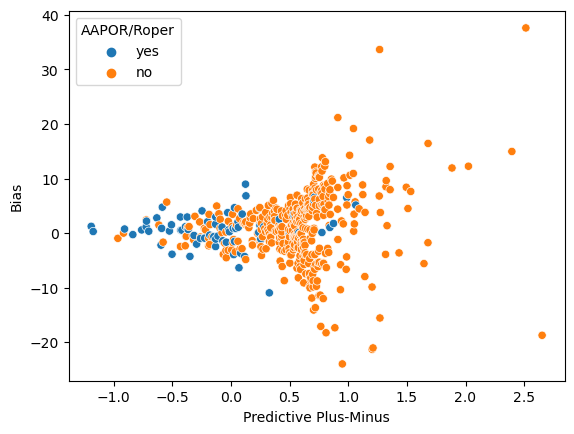

In [33]:
sns.scatterplot(
    data = df,
    x = 'Predictive Plus-Minus',
    y = 'Bias',
    hue = 'AAPOR/Roper'
);

In [34]:
df.groupby('AAPOR/Roper')['Races Called Correctly'].describe()

,count,mean,std,min,25%,50%,75%,max
AAPOR/Roper,,,,,,,,
no,438.0,0.764582,0.296165,0.0,0.666667,0.863701,1.000000,1.0
yes,79.0,0.791234,0.203867,0.0,0.724877,0.819820,0.940476,1.0
